<a href="https://colab.research.google.com/github/RichardCarrionF/RichardCarrionF/blob/main/Copy_of_Session_2_F_Student_Worksheet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 📊 Session 2 — Student Worksheet (Pandas + Plotly)
Work in small groups. Find a CSV dataset on GitHub, load it in Colab, and adapt commands from the workbook.
Be ready to walk through your code at the end.


## Part 1 — Find a Dataset (GitHub)

In [2]:
#This is the way to import from google drive
from google.colab import drive
drive.mount('/content/drive')

In [3]:
#LET'S START!
#--------------------------->
#Data:The dataset contains monthly climate records from 1950 to 2020, including average high, low, and mean temperatures, hottest and coldest extremes, and total precipitation

import pandas as pd
csv_url = "https://raw.githubusercontent.com/DJVolin/ClimateChangeNYC/refs/heads/main/1950_through_2020.csv"

Climate_change_NYC_df = pd.read_csv(csv_url)
Climate_change_NYC_df

,Year,Month,Avg. High,Avg. Low,Average,Hottest,Coldest,Precip.
0,1950,JAN,48.6,33.8,41.2,72,14,2.50
1,1950,FEB,38.3,26.4,32.4,50,6,4.20
2,1950,MAR,44.7,28.5,36.6,65,10,3.25
3,1950,APR,56.2,40.0,48.1,73,27,1.92
4,1950,MAY,66.5,50.3,58.4,82,41,2.47
...,...,...,...,...,...,...,...,...
847,2020,AUG,86.2,73.2,79.7,95,67,4.90
848,2020,SEP,77.3,64.8,71.1,89,51,4.17
849,2020,OCT,65.6,54.2,59.9,77,35,5.16
850,2020,NOV,61.4,47.2,54.3,78,33,4.42


## Part 2 — Load & Inspect

In [4]:
#Quick exploration
Climate_change_NYC_df.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 852 entries, 0 to 851
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Year       852 non-null    int64  
 1   Month      852 non-null    object 
 2   Avg. High  852 non-null    float64
 3   Avg. Low   852 non-null    float64
 4   Average    852 non-null    float64
 5   Hottest    852 non-null    int64  
 6   Coldest    852 non-null    int64  
 7   Precip.    852 non-null    float64
dtypes: float64(4), int64(3), object(1)
memory usage: 53.4+ KB


In [5]:
Climate_change_NYC_df.dtypes

,0
Year,int64
Month,object
Avg. High,float64
Avg. Low,float64
Average,float64
Hottest,int64
Coldest,int64
Precip.,float64


In [6]:
Climate_change_NYC_df.shape

(852, 8)

In [7]:
#Quick statistical summary of numerical columns in my DataFrame
Climate_change_NYC_df.describe()

,Year,Avg. High,Avg. Low,Average,Hottest,Coldest,Precip.
count,852.000000,852.000000,852.000000,852.000000,852.000000,852.000000,852.000000
mean,1985.000000,62.213850,48.403521,55.311385,78.197183,35.788732,3.673427
std,20.505939,16.491765,15.396745,15.919979,14.611895,18.418811,2.071026
min,1950.000000,27.700000,16.400000,22.300000,41.000000,-3.000000,0.060000
25%,1967.000000,47.150000,34.575000,40.700000,66.000000,19.000000,2.180000
50%,1985.000000,62.650000,47.650000,55.100000,80.000000,36.000000,3.365000
75%,2003.000000,78.025000,63.225000,70.625000,91.000000,52.000000,4.732500
max,2020.000000,90.600000,75.200000,82.900000,107.000000,68.000000,17.320000


## Part 3 — Explore & Clean

In [10]:
#Print missing values per column
print(Climate_change_NYC_df.isna().sum())

Year         0
Month        0
Avg. High    0
Avg. Low     0
Average      0
Hottest      0
Coldest      0
Precip.      0
dtype: int64


In [11]:
#No duplicates ;) --> This tell us which rows are duplicated
Climate_change_NYC_df[Climate_change_NYC_df.duplicated(keep=False)]

,Year,Month,Avg. High,Avg. Low,Average,Hottest,Coldest,Precip.


In [12]:
#Other way: this tell us how many duplicates exist, NO WHICH ONES (I'd use this first)
print(Climate_change_NYC_df.duplicated().sum())

0


In [19]:
Climate_change_NYC_df = Climate_change_NYC_df.rename(columns={
    "Avg. High": "avg_high",
    "Avg. Low": "avg_low",
    "Average": "average",
    "Hottest": "hottest",
    "Coldest": "coldest",
    "Precip.": "precip"
})

In [20]:
#review the change
print(Climate_change_NYC_df.head())

   Year Month  avg_high  avg_low  average  hottest  coldest  precip
0  1950   JAN      48.6     33.8     41.2       72       14    2.50
1  1950   FEB      38.3     26.4     32.4       50        6    4.20
2  1950   MAR      44.7     28.5     36.6       65       10    3.25
3  1950   APR      56.2     40.0     48.1       73       27    1.92
4  1950   MAY      66.5     50.3     58.4       82       41    2.47


## Part 4 — Summarization

In [25]:
#Group all rows by year, since my dataset is montly. The "agg" aggregates those 12 rows into 1 row per year.
#My outcome is a new dataframe with 1 row per year
# 1) Annual averages
annual_summary = Climate_change_NYC_df.groupby("Year").agg({
    "avg_high": "mean",
    "avg_low": "mean",
    "average": "mean",
    "hottest": "mean",
    "coldest": "mean",
    "precip": "sum"
}).reset_index()

#Let's see the first 10 years
display(annual_summary.head(10))

,Year,avg_high,avg_low,average,hottest,coldest,precip
0,1950,61.116667,46.258333,53.708333,78.000000,32.333333,42.79
1,1951,62.900000,47.858333,55.383333,78.583333,35.333333,51.40
2,1952,63.158333,48.966667,56.075000,77.583333,36.000000,51.35
3,1953,64.591667,49.683333,57.116667,81.416667,37.166667,51.19
4,1954,62.925000,47.700000,55.308333,78.083333,35.500000,42.68
5,1955,62.833333,47.516667,55.183333,78.000000,33.500000,46.88
6,1956,61.175000,47.191667,54.191667,78.333333,34.250000,41.21
7,1957,63.125000,48.516667,55.833333,79.333333,34.416667,38.05
8,1958,59.566667,46.391667,52.983333,73.750000,34.333333,51.34
9,1959,62.900000,48.183333,55.533333,78.500000,34.750000,41.05


In [22]:
#THIS WAS GREAT
#Every year gets replaced with the first year of its decade

# ONE "/"    --> Its a regular division and give you decimal (float) Ex: 1955/10 = 195.5
# TWHO "//"  --> Its called floor division(or integer divisio), it drops the decimal part and ROUNDS DOWN to the nearest whole numnber Ex: 1955//10= 195

# 2) Decade averages

Climate_change_NYC_df["Decade"] = (Climate_change_NYC_df["Year"] // 10) * 10
decadal_summary = Climate_change_NYC_df.groupby("Decade").agg({
    "avg_high": "mean",
    "avg_low": "mean",
    "average": "mean",
    "hottest": "mean",
    "coldest": "mean",
    "precip": "sum"
}).reset_index()


display(decadal_summary)

,Decade,avg_high,avg_low,average,hottest,coldest,precip
0,1950,62.429167,47.826667,55.131667,78.158333,34.758333,457.94
1,1960,60.760833,47.172500,53.965833,76.950000,34.708333,377.43
2,1970,60.751667,47.238333,54.000000,76.558333,34.358333,452.69
3,1980,61.533333,47.708333,54.620000,77.266667,34.466667,433.30
4,1990,63.175000,49.087500,56.134167,79.466667,36.516667,429.51
5,2000,62.808333,49.300000,56.060000,79.083333,37.125000,476.64
6,2010,63.730833,50.146667,56.940833,79.775000,38.275000,460.29
7,2020,65.291667,51.850000,58.583333,79.416667,38.916667,41.96


In [23]:
# 3) Monthly averages across all years
monthly_summary = Climate_change_NYC_df.groupby("Month").agg({
    "avg_high": "mean",
    "avg_low": "mean",
    "average": "mean",
    "precip": "mean"
}).reset_index()

display(monthly_summary)

,Month,avg_high,avg_low,average,precip
0,APR,60.226761,44.559155,52.397183,3.854789
1,AUG,83.254930,69.192958,76.226761,4.296901
2,DEC,43.540845,32.369014,37.960563,3.771408
3,FEB,41.178873,28.376056,34.771831,2.988732
4,JAN,38.850704,27.025352,32.935211,3.145915
5,JUL,84.984507,69.915493,77.453521,4.127887
6,JUN,79.876056,64.061972,71.974648,3.605915
7,MAR,48.766197,34.866197,41.818310,3.950141
8,MAY,70.576056,54.314085,62.446479,3.669859
9,NOV,54.064789,42.028169,48.049296,3.592535


In [26]:
# 4) Hottest and coldest year (by average)
hottest_year = annual_summary.loc[annual_summary["average"].idxmax()]
coldest_year = annual_summary.loc[annual_summary["average"].idxmin()]


#Hottest year by average temperature
display(hottest_year.to_frame().T)

#Coldest year by average temperature
display(coldest_year.to_frame().T)

,Year,avg_high,avg_low,average,hottest,coldest,precip
66,2016.0,65.716667,51.558333,58.65,81.166667,37.833333,39.39


,Year,avg_high,avg_low,average,hottest,coldest,precip
22,1972.0,58.875,45.341667,52.125,75.0,32.083333,54.68


## Part 5 — Visualization (Pandas + Plotly)

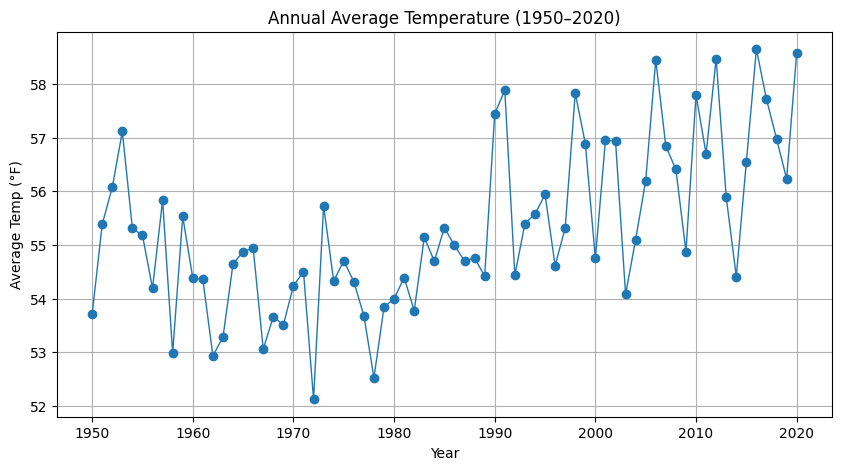

In [27]:
import matplotlib.pyplot as plt
# 1) Annual average temperature (line plot)
plt.figure(figsize=(10,5))
plt.plot(annual_summary["Year"], annual_summary["average"], marker="o", linewidth=1)
plt.title("Annual Average Temperature (1950–2020)")
plt.xlabel("Year")
plt.ylabel("Average Temp (°F)")
plt.grid(True)
plt.show()

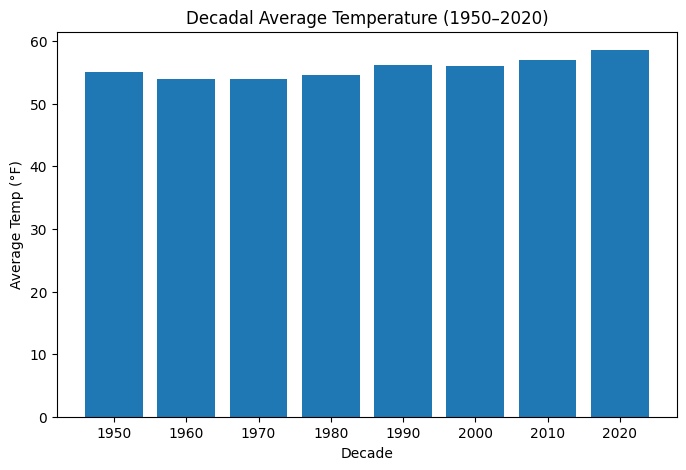

In [28]:
# 2) Decadal average temperature (bar chart)
plt.figure(figsize=(8,5))
plt.bar(decadal_summary["Decade"], decadal_summary["average"], width=8)
plt.title("Decadal Average Temperature (1950–2020)")
plt.xlabel("Decade")
plt.ylabel("Average Temp (°F)")
plt.show()

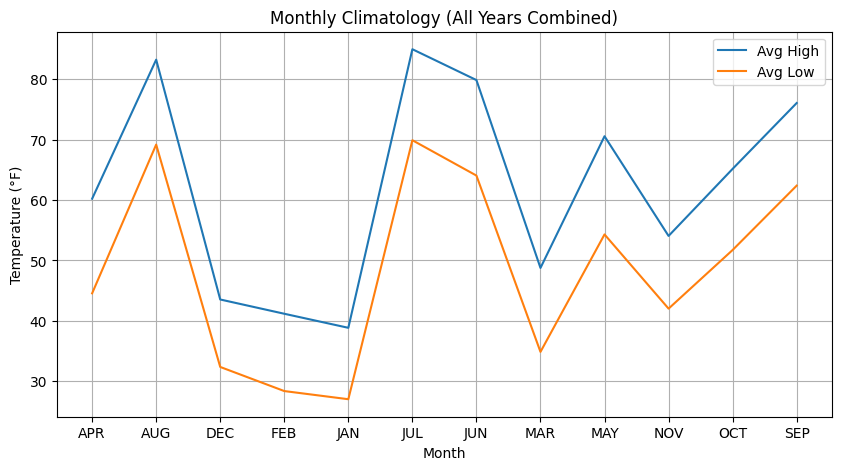

In [29]:
# 3) Monthly climatology (line plot)
plt.figure(figsize=(10,5))
plt.plot(monthly_summary["Month"], monthly_summary["avg_high"], label="Avg High")
plt.plot(monthly_summary["Month"], monthly_summary["avg_low"], label="Avg Low")
plt.title("Monthly Climatology (All Years Combined)")
plt.xlabel("Month")
plt.ylabel("Temperature (°F)")
plt.legend()
plt.grid(True)
plt.show()

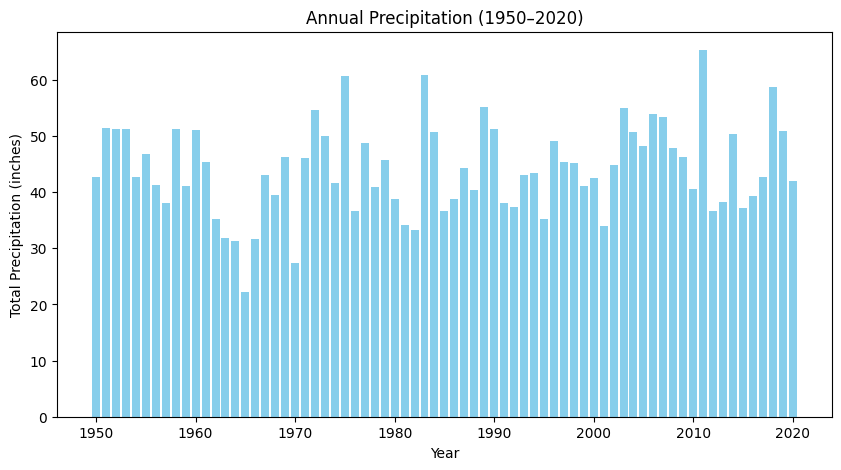

In [31]:
# 4) Annual precipitation (bar chart)
plt.figure(figsize=(10,5))
plt.bar(annual_summary["Year"], annual_summary["precip"], color="skyblue")
plt.title("Annual Precipitation (1950–2020)")
plt.xlabel("Year")
plt.ylabel("Total Precipitation (inches)")
plt.show()

In [ ]:
import plotly.express as px

bar_df = by_cat.head(10).reset_index()
fig = px.bar(bar_df, x=category_col, y=numeric_col, title=f'Top 10 {category_col} (interactive)')
fig.show()

## Part 6 — Reflection
- What needed adjusting when you switched datasets?
- What was easier/harder vs the workbook?
- What context/limitations should a policymaker know?


## Part 7 — ⚡ Lightning Chart Demos — Teach-Out Instructions

### What is a Lightning Demo?
A **rapid-fire mini-presentation**: 2 minutes per group. Show **one chart** + **one insight**, not your whole notebook.

### Demo Format (2 minutes)
1. **Context (15 sec):** Dataset name + 1-sentence purpose.  
2. **Chart + Insight (75–90 sec):** Show interactive Plotly chart; state one clear finding; name one wrangling step.  
3. **Caveat or Next Step (15–30 sec):** One limitation OR next idea.  
4. **Pass the mic (10 sec):** End with *“Any questions about our chart?”*

### Unique Angles
- Aggregation choice (sum vs mean, raw vs normalized).  
- Data cleaning step (conversion, deduping).  
- Encoding (bar vs line vs scatter).  
- Interactivity (facet, hover, filter).  
- Comparability (per capita vs raw counts).  
- Temporal nuance (trend vs snapshot).  

👉 If another group showed your angle, pick a different one.

### Flow for the Day
- Groups present **clustered by chart type** (bars, lines, scatter, other).  
- Instructor summarizes similarities/differences after each cluster.  
- 15 groups × 2 min = ~30 minutes + transitions = ~40 minutes.

### Presenter Checklist
- [ ] Dataset URL loads in Colab  
- [ ] Columns chosen make sense  
- [ ] One **interactive Plotly figure** with title + labels  
- [ ] Insight stated in one sentence  
- [ ] One cleaning step mentioned  

### Audience Task
After each cluster, jot 1 sentence:  
- What was **similar** across charts?  
- What was **different** (aggregation, encoding, interactivity)?  
- Which chart best supported a **policy decision**—and why?

---
### Quick Rubric (3 pts)
- **Clarity of claim (1 pt)**  
- **Method fit (1 pt)**  
- **Insight/caveat (1 pt)**  
(Bonus +0.5 for meaningful interactivity)

---
### Minimal Code Patterns

**Top-N bar:**
```python
bar_df = df.groupby(category_col)[numeric_col].sum().nlargest(10).reset_index()
fig = px.bar(bar_df, x=category_col, y=numeric_col,
             title=f"Top 10 {category_col} by {numeric_col}")
fig.show()
```

**Time series:**
```python
ts = (df.groupby(time_col)[numeric_col]
        .sum()
        .reset_index()
        .sort_values(time_col))
fig = px.line(ts, x=time_col, y=numeric_col, markers=True,
              title=f"{numeric_col} over time")
fig.show()
```

**Scatter:**
```python
fig = px.scatter(df, x=x_col, y=y_col, trendline="ols",
                 title=f"{y_col} vs {x_col}")
fig.show()
```

---